In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
csv_file_path = r'c:\Users\hp\Desktop\bmsis-ysp\Elemental Composition assignments (.csv)\2023March23NegESI_9_Lon94101_Sum200.csv'

In [3]:
fixed_columns = ["Average Noise", "Exp. m/z", "Recal m/z", "Theor. Mass", "Error", "Rel. Abundance", "Signal2Noise", "DBE", "H/C", "O/C", "Molecular Formula"]

In [4]:
data = []
max_extra_columns = 0

with open(csv_file_path, 'r') as file:
    for _ in range(2):
        next(file)

    for line in file:
        row = line.strip().split(',')
        fixed_part = row[:len(fixed_columns)]
        extra_part = row[len(fixed_columns):]
        max_extra_columns = max(max_extra_columns, len(extra_part))
        data.append(fixed_part + extra_part)

extra_columns = [f'Extra Col {i+1}' for i in range(max_extra_columns)]
all_columns = fixed_columns + extra_columns

df = pd.DataFrame(data, columns=all_columns)

In [5]:
start_idx = df.columns.get_loc("Molecular Formula")
cols_to_merge = df.columns[start_idx:]
df['Molecular Formula'] = df[cols_to_merge].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)
df = df.drop(columns=cols_to_merge.difference(['Molecular Formula']))
df.head()

,Average Noise,Exp. m/z,Recal m/z,Theor. Mass,Error,Rel. Abundance,Signal2Noise,DBE,H/C,O/C,Molecular Formula
0,1,207.17543,207.17543,207.175438937,0.0431381732599,0.0524742,0,3.0,1.71428571429,0.0714285714286,C 14 H 23 N 0 O 1 S 0 13C 0
1,2,221.19109,221.19109,221.191089001,-0.0045150553622,0.0569366,0,3.0,1.73333333333,0.0666666666667,C 15 H 25 N 0 O 1 S 0 13C 0
2,3,177.12848,177.12848,177.128488745,0.0493695286793,0.0547309,0,4.0,1.5,0.0833333333333,C 12 H 17 N 0 O 1 S 0 13C 0
3,4,205.15979,205.15979,205.159788873,-0.00549313299408,0.0677567,0,4.0,1.57142857143,0.0714285714286,C 14 H 21 N 0 O 1 S 0 13C 0
4,5,219.17544,219.17544,219.175438937,-0.00484922046127,0.1703591,0,4.0,1.6,0.0666666666667,C 15 H 23 N 0 O 1 S 0 13C 0


In [6]:
df = df.dropna()

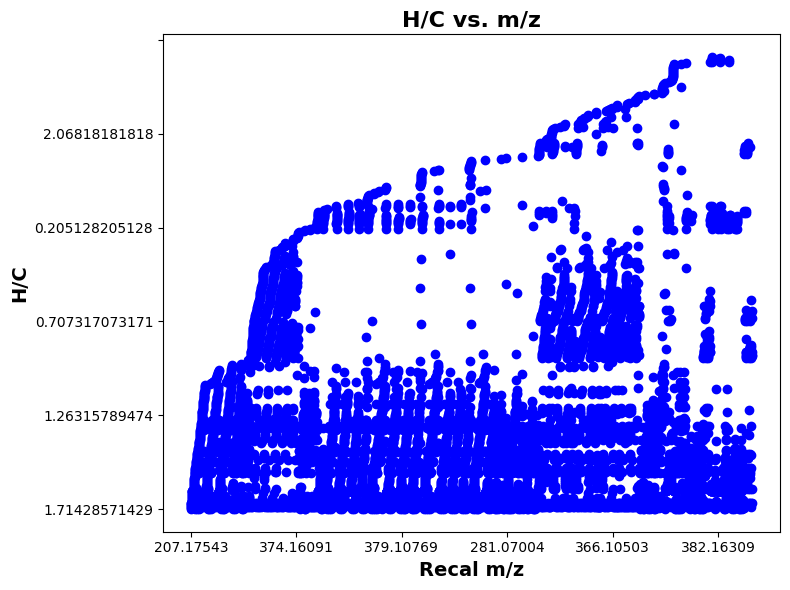

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Recal m/z"], df["H/C"], color='blue')
plt.xlabel("Recal m/z", fontweight='bold', fontsize=14)
plt.ylabel("H/C", fontweight='bold', fontsize=14)
plt.title("H/C vs. m/z", fontweight='bold', fontsize=16)

num_ticks = 6
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(num_ticks))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(num_ticks))

plt.tight_layout()
plt.show()

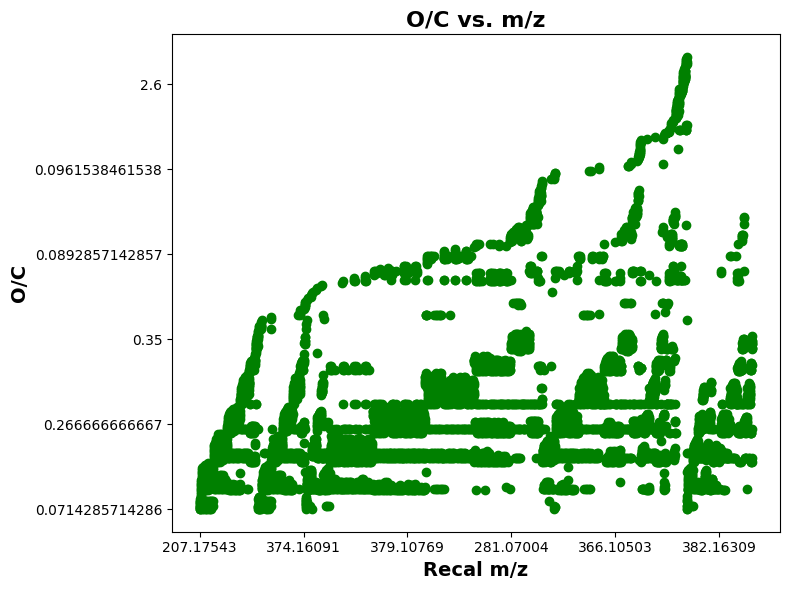

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Recal m/z"], df["O/C"], color='green')
plt.xlabel("Recal m/z", fontweight='bold', fontsize=14)
plt.ylabel("O/C", fontweight='bold', fontsize=14)
plt.title("O/C vs. m/z", fontweight='bold', fontsize=16)

num_ticks = 6
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(num_ticks))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(num_ticks))

plt.tight_layout()
plt.show()

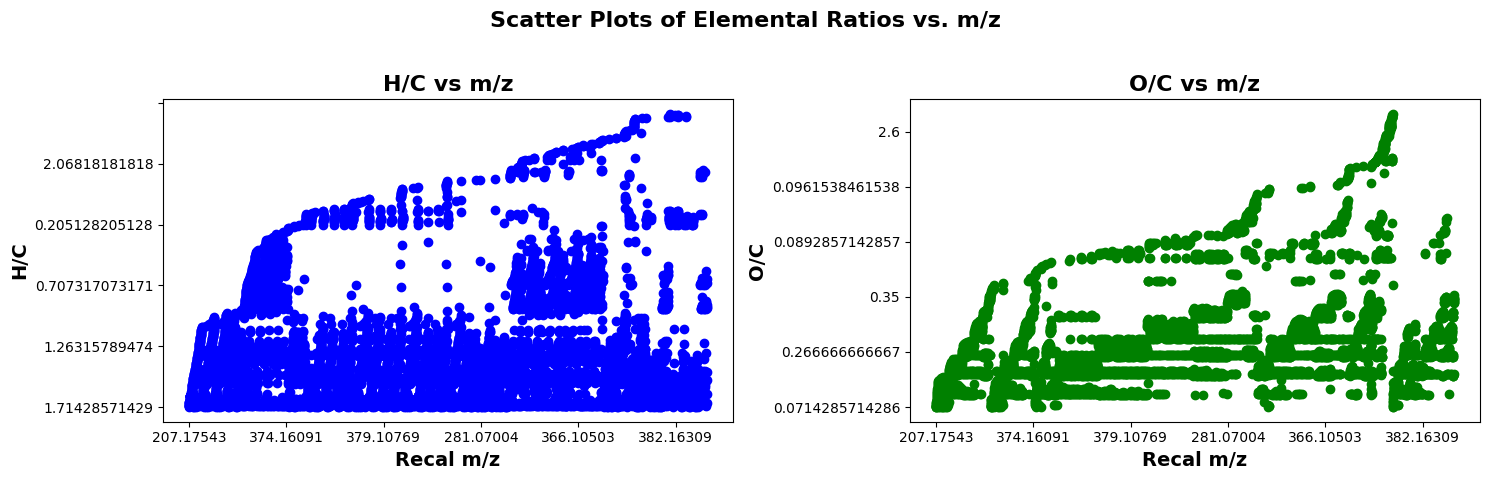

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Scatter Plots of Elemental Ratios vs. m/z', fontweight='bold', fontsize=16)

# H/C vs. m/z
axs[0].scatter(df["Recal m/z"], df["H/C"], color='blue')
axs[0].set_xlabel("Recal m/z", fontweight='bold', fontsize=14)
axs[0].set_ylabel("H/C", fontweight='bold', fontsize=14)
axs[0].set_title("H/C vs m/z", fontweight='bold', fontsize=16)
num_ticks = 6
axs[0].xaxis.set_major_locator(plt.MaxNLocator(num_ticks))
axs[0].yaxis.set_major_locator(plt.MaxNLocator(num_ticks))

# O/C vs. m/z
axs[1].scatter(df["Recal m/z"], df["O/C"], color='green')
axs[1].set_xlabel("Recal m/z", fontweight='bold', fontsize=14)
axs[1].set_ylabel("O/C", fontweight='bold', fontsize=14)
axs[1].set_title("O/C vs m/z", fontweight='bold', fontsize=16)
axs[1].xaxis.set_major_locator(plt.MaxNLocator(num_ticks))
axs[1].yaxis.set_major_locator(plt.MaxNLocator(num_ticks))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [10]:
def extract_element_count(formula, element):
    elements = formula.split()
    count = 0
    for i in range(0, len(elements), 2):
        if elements[i] == element:
            count = int(elements[i+1])
            break
    return count

In [11]:
df['N/C'] = df['Molecular Formula'].apply(lambda x: extract_element_count(x, 'N') / extract_element_count(x, 'C') if extract_element_count(x, 'C') != 0 else 0)
df['O/N'] = df['Molecular Formula'].apply(lambda x: extract_element_count(x, 'O') / extract_element_count(x, 'N') if extract_element_count(x, 'N') != 0 else 0)

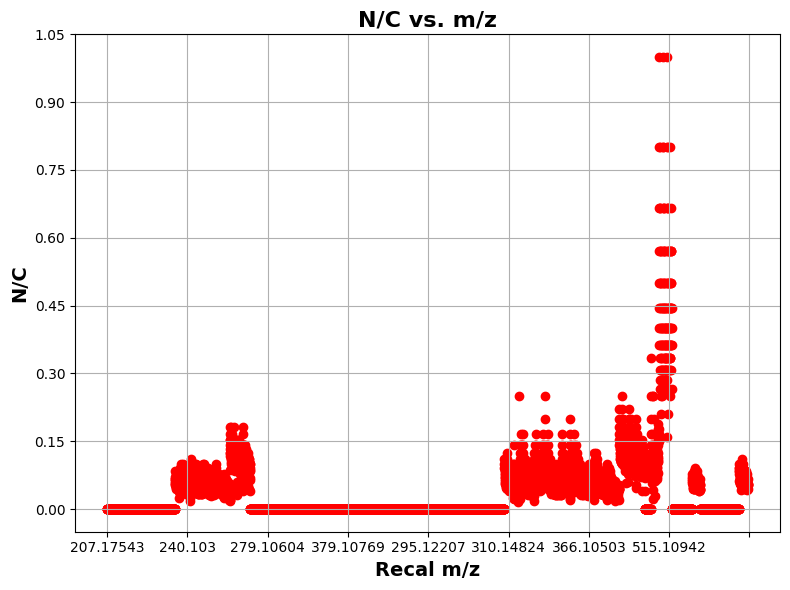

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Recal m/z"], df["N/C"], color='red')
plt.xlabel("Recal m/z", fontweight='bold', fontsize=14)
plt.ylabel("N/C", fontweight='bold', fontsize=14)
plt.title("N/C vs. m/z", fontweight='bold', fontsize=16)

num_ticks = 10
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(num_ticks))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(num_ticks))

plt.grid(True)
plt.tight_layout()
plt.show()


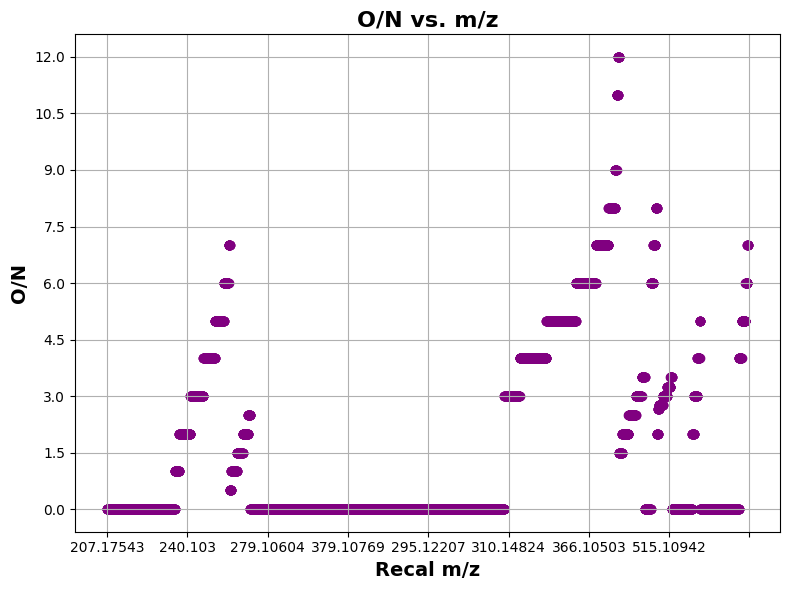

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(df["Recal m/z"], df["O/N"], color='purple')
plt.xlabel("Recal m/z", fontweight='bold', fontsize=14)
plt.ylabel("O/N", fontweight='bold', fontsize=14)
plt.title("O/N vs. m/z", fontweight='bold', fontsize=16)

# Limiting number of ticks
num_ticks = 10
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(num_ticks))
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(num_ticks))

plt.grid(True)
plt.tight_layout()
plt.show()

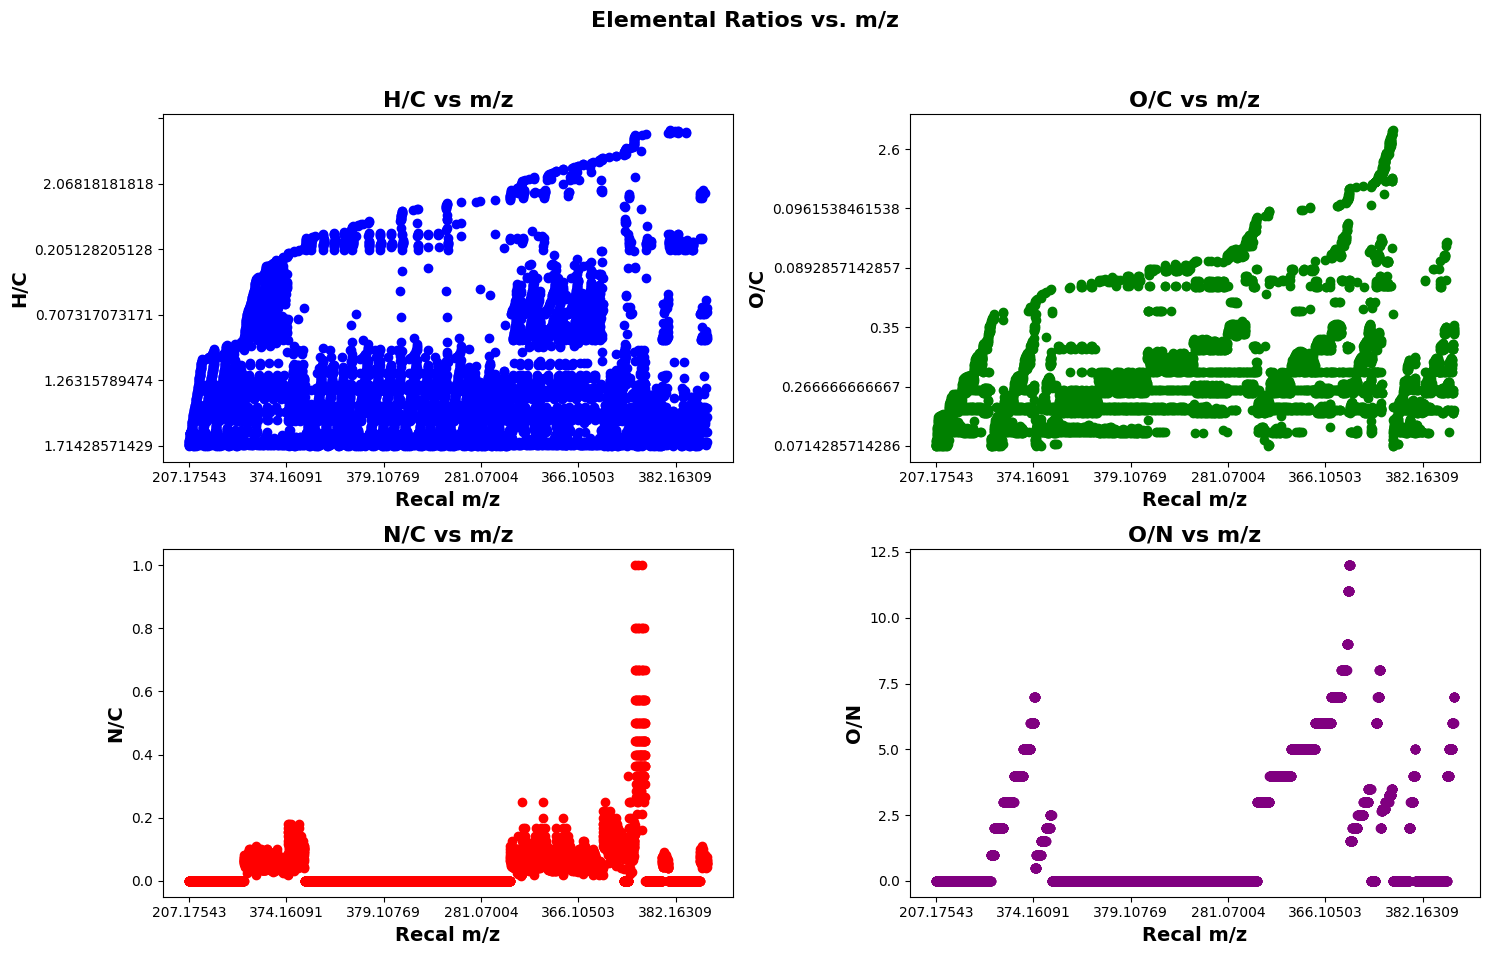

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Elemental Ratios vs. m/z', fontweight='bold', fontsize=16)

# H/C vs. m/z
axs[0, 0].scatter(df["Recal m/z"], df["H/C"], color='blue')
axs[0, 0].set_xlabel("Recal m/z", fontweight='bold', fontsize=14)
axs[0, 0].set_ylabel("H/C", fontweight='bold', fontsize=14)
axs[0, 0].set_title("H/C vs m/z", fontweight='bold', fontsize=16)
num_ticks = 6
axs[0, 0].xaxis.set_major_locator(plt.MaxNLocator(num_ticks))
axs[0, 0].yaxis.set_major_locator(plt.MaxNLocator(num_ticks))

# O/C vs. m/z
axs[0, 1].scatter(df["Recal m/z"], df["O/C"], color='green')
axs[0, 1].set_xlabel("Recal m/z", fontweight='bold', fontsize=14)
axs[0, 1].set_ylabel("O/C", fontweight='bold', fontsize=14)
axs[0, 1].set_title("O/C vs m/z", fontweight='bold', fontsize=16)
axs[0, 1].xaxis.set_major_locator(plt.MaxNLocator(num_ticks))
axs[0, 1].yaxis.set_major_locator(plt.MaxNLocator(num_ticks))

# N/C vs. m/z
axs[1, 0].scatter(df["Recal m/z"], df["N/C"], color='red')
axs[1, 0].set_xlabel("Recal m/z", fontweight='bold', fontsize=14)
axs[1, 0].set_ylabel("N/C", fontweight='bold', fontsize=14)
axs[1, 0].set_title("N/C vs m/z", fontweight='bold', fontsize=16)
axs[1, 0].xaxis.set_major_locator(plt.MaxNLocator(num_ticks))
axs[1, 0].yaxis.set_major_locator(plt.MaxNLocator(num_ticks))

# O/N vs. m/z
axs[1, 1].scatter(df["Recal m/z"], df["O/N"], color='purple')
axs[1, 1].set_xlabel("Recal m/z", fontweight='bold', fontsize=14)
axs[1, 1].set_ylabel("O/N", fontweight='bold', fontsize=14)
axs[1, 1].set_title("O/N vs m/z", fontweight='bold', fontsize=16)
axs[1, 1].xaxis.set_major_locator(plt.MaxNLocator(num_ticks))
axs[1, 1].yaxis.set_major_locator(plt.MaxNLocator(num_ticks))

plt.subplots_adjust(hspace=0.8)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

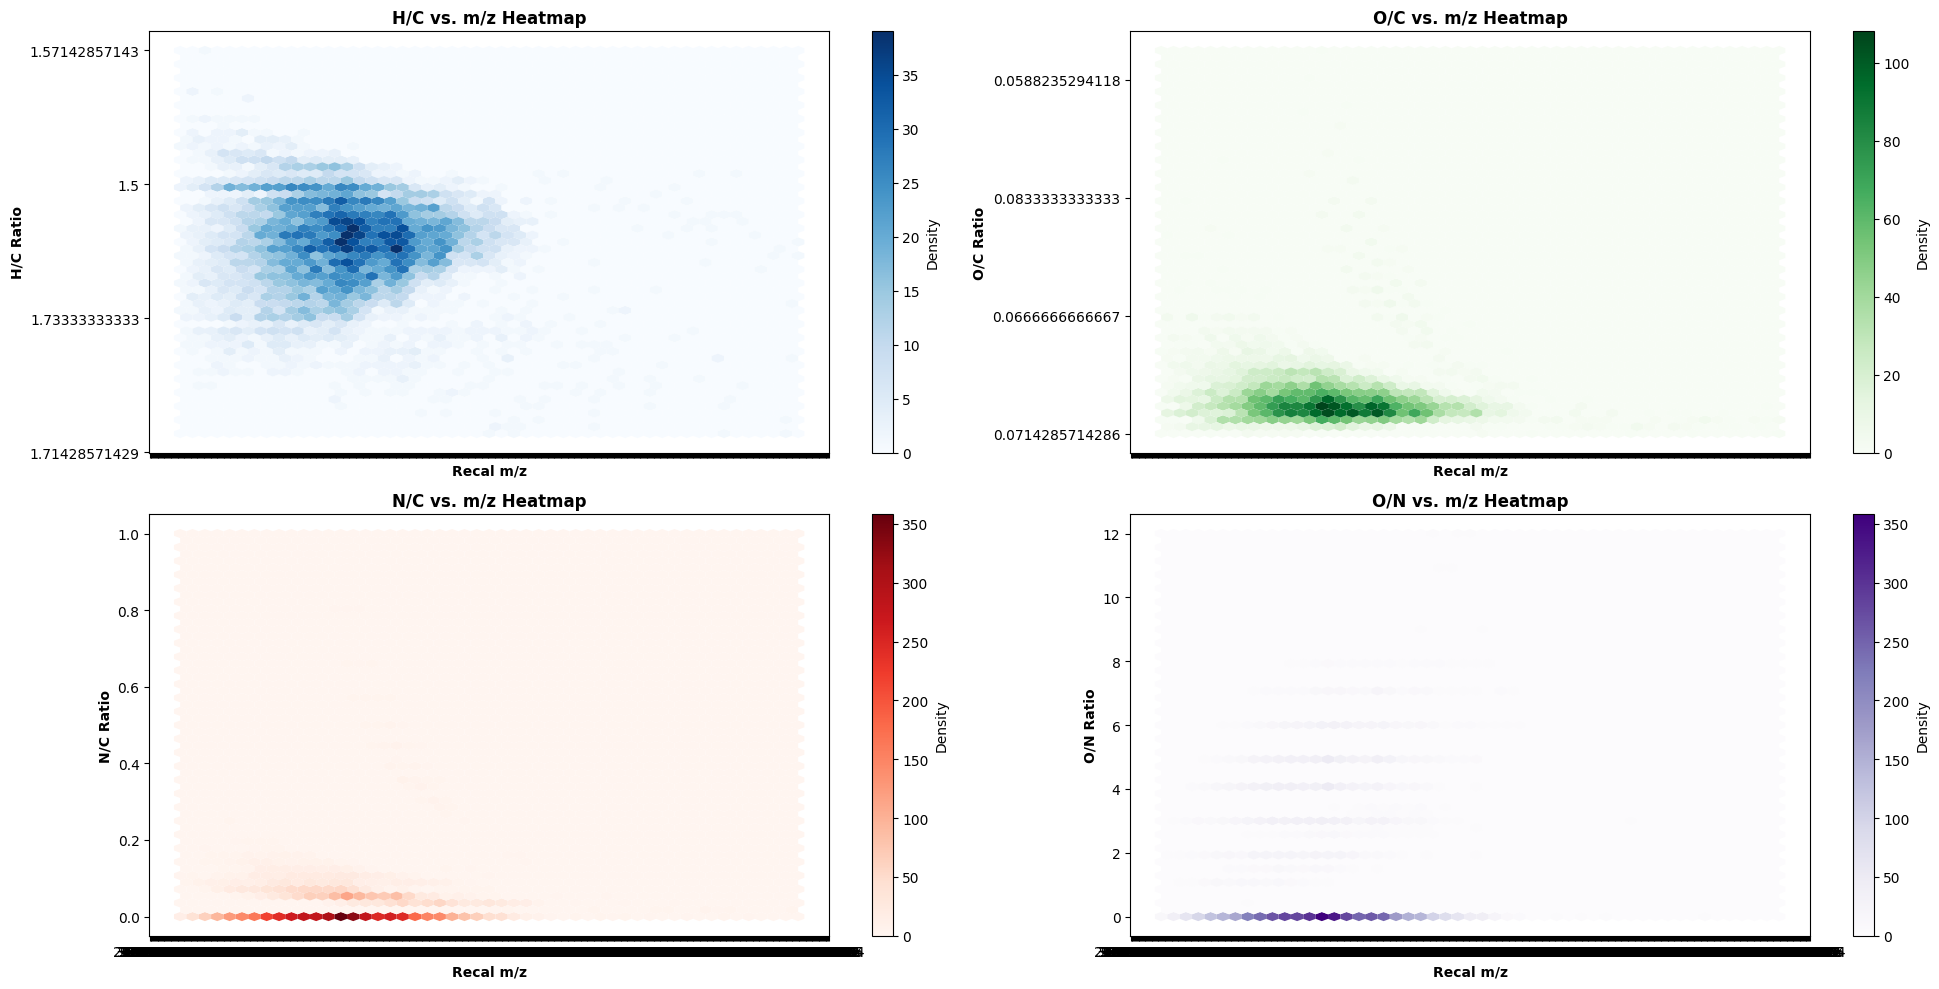

In [18]:
mz_values = df["Recal m/z"]
hc_ratios = df["H/C"]
oc_ratios = df["O/C"]
nc_ratios = df["N/C"]
on_ratios = df["O/N"]

fig, axs = plt.subplots(2, 2, figsize=(20, 10), sharex=True)

# H/C vs. m/z Heatmap
hb1 = axs[0, 0].hexbin(mz_values, hc_ratios, gridsize=50, cmap='Blues', edgecolors='none')
axs[0, 0].set_title('H/C vs. m/z Heatmap', fontsize=12, fontweight='bold')
axs[0, 0].set_xlabel('Recal m/z', fontsize=10, fontweight='bold')
axs[0, 0].set_ylabel('H/C Ratio', fontsize=10, fontweight='bold')
cb1 = fig.colorbar(hb1, ax=axs[0, 0])
cb1.set_label('Density')

# O/C vs. m/z Heatmap
hb2 = axs[0, 1].hexbin(mz_values, oc_ratios, gridsize=50, cmap='Greens', edgecolors='none')
axs[0, 1].set_title('O/C vs. m/z Heatmap', fontsize=12, fontweight='bold')
axs[0, 1].set_xlabel('Recal m/z', fontsize=10, fontweight='bold')
axs[0, 1].set_ylabel('O/C Ratio', fontsize=10, fontweight='bold')
cb2 = fig.colorbar(hb2, ax=axs[0, 1])
cb2.set_label('Density')

# N/C vs. m/z Heatmap
hb3 = axs[1, 0].hexbin(mz_values, nc_ratios, gridsize=50, cmap='Reds', edgecolors='none')
axs[1, 0].set_title('N/C vs. m/z Heatmap', fontsize=12, fontweight='bold')
axs[1, 0].set_xlabel('Recal m/z', fontsize=10, fontweight='bold')
axs[1, 0].set_ylabel('N/C Ratio', fontsize=10, fontweight='bold')
cb3 = fig.colorbar(hb3, ax=axs[1, 0])
cb3.set_label('Density')

# O/N vs. m/z Heatmap
hb4 = axs[1, 1].hexbin(mz_values, on_ratios, gridsize=50, cmap='Purples', edgecolors='none')
axs[1, 1].set_title('O/N vs. m/z Heatmap', fontsize=12, fontweight='bold')
axs[1, 1].set_xlabel('Recal m/z', fontsize=10, fontweight='bold')
axs[1, 1].set_ylabel('O/N Ratio', fontsize=10, fontweight='bold')
cb4 = fig.colorbar(hb4, ax=axs[1, 1])
cb4.set_label('Density')

plt.tight_layout()
plt.show()

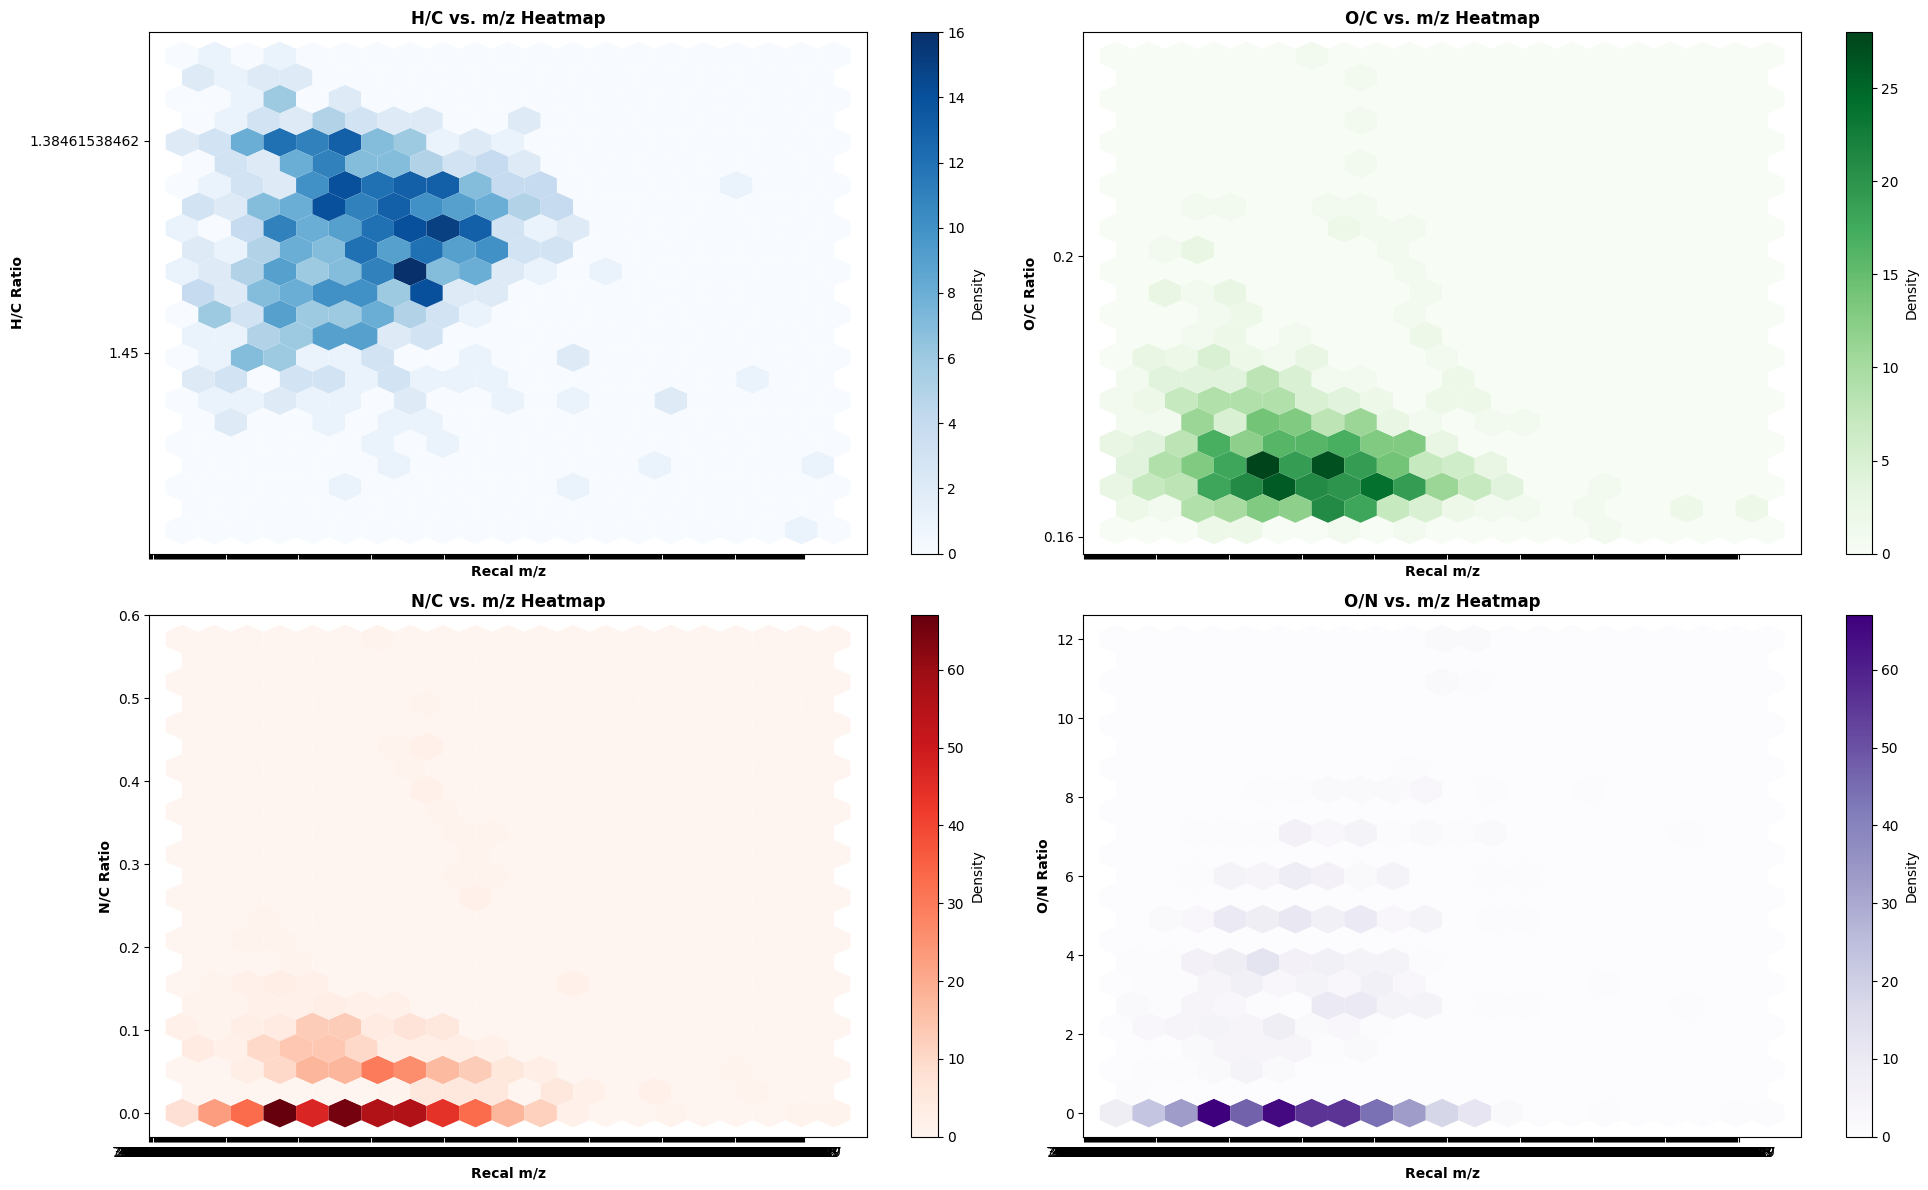

In [19]:
subset_df = df.sample(frac=0.1)  # Sample 10% of the data

mz_values = subset_df["Recal m/z"]
hc_ratios = subset_df["H/C"]
oc_ratios = subset_df["O/C"]
nc_ratios = subset_df["N/C"]
on_ratios = subset_df["O/N"]

fig, axs = plt.subplots(2, 2, figsize=(20, 12), sharex=True)

# H/C vs. m/z Heatmap
hb1 = axs[0, 0].hexbin(mz_values, hc_ratios, gridsize=20, cmap='Blues', edgecolors='none')
axs[0, 0].set_title('H/C vs. m/z Heatmap', fontsize=12, fontweight='bold')
axs[0, 0].set_xlabel('Recal m/z', fontsize=10, fontweight='bold')
axs[0, 0].set_ylabel('H/C Ratio', fontsize=10, fontweight='bold')
cb1 = fig.colorbar(hb1, ax=axs[0, 0])
cb1.set_label('Density')

# O/C vs. m/z Heatmap
hb2 = axs[0, 1].hexbin(mz_values, oc_ratios, gridsize=20, cmap='Greens', edgecolors='none')
axs[0, 1].set_title('O/C vs. m/z Heatmap', fontsize=12, fontweight='bold')
axs[0, 1].set_xlabel('Recal m/z', fontsize=10, fontweight='bold')
axs[0, 1].set_ylabel('O/C Ratio', fontsize=10, fontweight='bold')
cb2 = fig.colorbar(hb2, ax=axs[0, 1])
cb2.set_label('Density')

# N/C vs. m/z Heatmap
hb3 = axs[1, 0].hexbin(mz_values, nc_ratios, gridsize=20, cmap='Reds', edgecolors='none')
axs[1, 0].set_title('N/C vs. m/z Heatmap', fontsize=12, fontweight='bold')
axs[1, 0].set_xlabel('Recal m/z', fontsize=10, fontweight='bold')
axs[1, 0].set_ylabel('N/C Ratio', fontsize=10, fontweight='bold')
cb3 = fig.colorbar(hb3, ax=axs[1, 0])
cb3.set_label('Density')

# O/N vs. m/z Heatmap
hb4 = axs[1, 1].hexbin(mz_values, on_ratios, gridsize=20, cmap='Purples', edgecolors='none')
axs[1, 1].set_title('O/N vs. m/z Heatmap', fontsize=12, fontweight='bold')
axs[1, 1].set_xlabel('Recal m/z', fontsize=10, fontweight='bold')
axs[1, 1].set_ylabel('O/N Ratio', fontsize=10, fontweight='bold')
cb4 = fig.colorbar(hb4, ax=axs[1, 1])
cb4.set_label('Density')

plt.tight_layout()
plt.show()